In [5]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
%pylab inline
from livelossplot import PlotLosses
from tqdm import trange, tqdm
import math
import torchvision

from sklearn.metrics import classification_report, f1_score

device = "cuda:0" if torch.cuda.is_available() else "cpu"

def encode_labels(label):
    if math.isnan(label):
        return np.zeros(5)
    else:
        return np.eye(5)[int(label - 1)]

def encode_features(label):
    if math.isnan(label):
        return np.zeros(5)
    else:
        x = np.zeros(5)
        for i in range(int(label)):
            x = x + np.eye(5)[i]
        return x
_data = pd.read_csv('data.csv')

_data

Populating the interactive namespace from numpy and matplotlib


,Unnamed: 0,article_id,link,title,main_category,category_1,category_2,category_3,category_4,suprise_r1,...,c2_familiarity_r2,c2_familiarity_r3,c3_familiarity_r1,c3_familiarity_r2,c3_familiarity_r3,c4_familiarity_r1,c4_familiarity_r2,c4_familiarity_r3,article,avg_surprise
0,0,9432,http://www.medicalnewstoday.com/articles/14131...,Depression also a problem in patients with Par...,Depression,Depression,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n\r\n\r\n\r\n\r\nWhile Parkinson's disease...,2.333333
1,1,17114,http://www.medicalnewstoday.com/articles/23226...,Testing new manic depression drugs in slime mo...,Depression,Depression,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n\r\n\r\n\r\n\r\nResearch by University Col...,4.666667
2,2,388,http://www.medicalnewstoday.com/articles/4063.php,Dietary cocktail reduces cancer deaths,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n\r\n\r\n\r\n\r\nA dietary supplement of v...,3.666667
3,3,1650,http://www.medicalnewstoday.com/articles/5331.php,Super smoking addicts see cigarettes as their pal,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n\r\n\r\n\r\n\r\nHeavy smokers ? those who ...,1.000000
4,4,1850,http://www.medicalnewstoday.com/articles/5533.php,How to reduce your chances of developing colon...,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n\r\n\r\n\r\n\r\nAccording to a reputable r...,2.333333
5,5,2836,http://www.medicalnewstoday.com/articles/6577.php,Atkins diet for fat kids says cancer specialis...,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"\r\n\r\n\r\n\r\n\r\nCancer specialist, Julian ...",2.333333
6,6,7273,http://www.medicalnewstoday.com/articles/11534...,Mothers turn fearless when peptide level drops,Depression,Depression,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n\r\n\r\n\r\n\r\nEveryone knows not to get ...,4.333333
7,7,1000,http://www.medicalnewstoday.com/articles/4677.php,How bullied children are affected,Depression,Depression,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n\r\n\r\n\r\n\r\nThey're more likely to exh...,1.333333
8,8,268304,http://www.medicalnewstoday.com/articles/31037...,Is an insulin pump the best therapy for everyo...,Diabetes,Diabetes,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Insulin pump therapy contributes to better blo...,2.333333
9,9,1162,http://www.medicalnewstoday.com/articles/4841.php,Visit Dentist Before Radiation Therapy to Prev...,Cancer / Oncology,Cancer / Oncology,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n\r\n\r\n\r\n\r\nCHICAGO (USA) - More than ...,1.666667


In [14]:
_data = pd.read_csv('data.csv')
r1_data = _data[[
    'category_1', 'category_2', 'category_3', 'category_4', 'suprise_r1',
     'c1_familiarity_r1', 'c2_familiarity_r1', 'c3_familiarity_r1', 'c4_familiarity_r1', 'like_r1', 'article'
]]
r2_data = _data[[
    'category_1', 'category_2', 'category_3', 'category_4', 'suprise_r2',
     'c1_familiarity_r2', 'c2_familiarity_r2', 'c3_familiarity_r2', 'c4_familiarity_r2', 'like_r2', 'article'
]]
r3_data = _data[[
    'category_1', 'category_2', 'category_3', 'category_4', 'suprise_r3',
     'c1_familiarity_r3', 'c2_familiarity_r3', 'c3_familiarity_r3', 'c4_familiarity_r3', 'like_r3', 'article'
]]

# data = _data[['article', '

In [20]:
r1_data.columns = ['category_1', 'category_2', 'category_3', 'category_4', 'suprise',
       'c1_familiarity', 'c2_familiarity', 'c3_familiarity',
       'c4_familiarity', 'like', 'article']
r2_data.columns = ['category_1', 'category_2', 'category_3', 'category_4', 'suprise',
       'c1_familiarity', 'c2_familiarity', 'c3_familiarity',
       'c4_familiarity', 'like', 'article']
r3_data.columns = ['category_1', 'category_2', 'category_3', 'category_4', 'suprise',
       'c1_familiarity', 'c2_familiarity', 'c3_familiarity',
       'c4_familiarity', 'like', 'article']

_data = pd.DataFrame(columns=r1_data.columns)
_data = _data.append([r1_data, r2_data, r2_data])
_data.to_csv('1500cases.csv')

In [2]:
suprise_r3']].values.tolist()


split_at = int(0.9 * len(data))
train, test = data[:split_at], data[split_at:]

data = [np.concatenate((
    x[1], x[2], x[3], x[4], x[5],
    x[6], x[7], x[8], x[9], x[10],
    x[11], x[12], x[13], x[14], x[15],
    x[0])) for x in data]

train_data = [np.concatenate((x[1], x[2], x[3], x[4], x[5])) for x in train]
train_labels = [x[0] for x in train]

test_data = [np.concatenate((x[1], x[2], x[3], x[4], x[5])) for x in test]
test_labels = [x[0] for x in test]

In [3]:
train_data = [torch.tensor(x, dtype=torch.float) for x in train_data]
test_data = [torch.tensor(x, dtype=torch.float) for x in test_data]

train_labels = [torch.tensor(x, dtype=torch.float) for x in train_labels]
test_labels = [torch.tensor(x, dtype=torch.float) for x in test_labels]

model = nn.Sequential(
    nn.Linear(75, 150, bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(150, 25, bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(25, 5, bias=True),
)

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, amsgrad=True)

In [4]:
dataset = torch.utils.data.TensorDataset(torch.tensor(data, dtype=torch.float))
train, test = torch.utils.data.random_split(dataset, (int(0.9*len(data)), int(0.1*len(data))))

train_batches = torch.utils.data.DataLoader(
    train,
    batch_size = 32,
    shuffle = True,
    pin_memory = True    
)

test_batches = torch.utils.data.DataLoader(
    test,
    batch_size = 32,
    shuffle = True,
    pin_memory = True
)

# model.to(device)
live_loss = PlotLosses()


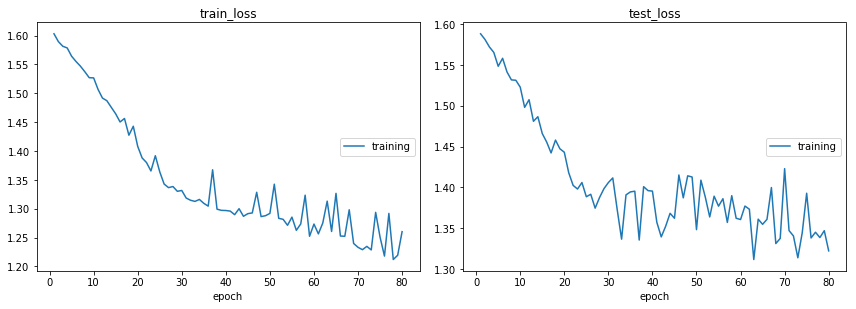

In [5]:
for epoch in range(80):
    model.train()
    train_errors = []
    for batch in tqdm(train_batches):
        x = batch[0].narrow(1, 0, 75)
        y = torch.argmax(batch[0].narrow(1, 75, 5), dim=1)
        
        pred = model(x)
        error = loss(pred, y)
        
        optimizer.zero_grad()
        error.backward()
        optimizer.step()
        train_errors.append(error.data.item())
        
    test_errors = []
    for batch in test_batches:
        x = batch[0].narrow(1, 0, 75)
        y = torch.argmax(batch[0].narrow(1, 75, 5), dim=1)
        
        pred = model(x)
        error = loss(pred, y)
        
        test_errors.append(error.data.item())
        
        
    live_loss.update({
        'train_loss': torch.tensor(train_errors).mean(),
        'test_loss': torch.tensor(test_errors).mean(),
    })
    live_loss.draw()

In [6]:
test_batches = torch.utils.data.DataLoader(
    test,
    batch_size = 50,
    shuffle = True,
    pin_memory = True
)
for batch in test_batches:
    x = batch[0].narrow(1, 0, 75)
    test_actual = torch.argmax(batch[0].narrow(1, 75, 5), dim=1).numpy()
    test_predictions = torch.argmax(model(x), dim=1).numpy()
    
train_batches = torch.utils.data.DataLoader(
    train,
    batch_size = 450,
    shuffle = True,
    pin_memory = True
)
for batch in train_batches:
    x = batch[0].narrow(1, 0, 75)
    train_actual = torch.argmax(batch[0].narrow(1, 75, 5), dim=1).numpy()
    train_predictions = torch.argmax(model(x), dim=1).numpy()
    
    

In [7]:
print("---------------- Test batch ----------------")
print(classification_report(test_actual, test_predictions))
print("---------------- Train batch ----------------")
print(classification_report(train_actual, train_predictions))

---------------- Test batch ----------------


c:\users\dhruv\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        13
           2       0.39      0.75      0.52        20
           3       0.33      0.36      0.35        11
           4       0.00      0.00      0.00         2

   micro avg       0.38      0.38      0.38        50
   macro avg       0.15      0.22      0.17        50
weighted avg       0.23      0.38      0.28        50

---------------- Train batch ----------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.86      0.10      0.18       120
           2       0.45      0.85      0.58       158
           3       0.60      0.61      0.60       133
           4       0.00      0.00      0.00        13

   micro avg       0.50      0.50      0.50       450
   macro avg       0.38      0.31      0.27       450
weighted avg       0.56      0.

In [8]:
train_predictions

array([3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3,
       2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 2, 3, 2,
       2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2,
       2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 1,
       2, 3, 2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 2,
       3, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2,

In [9]:
test_predictions

array([2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2,
       3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       3, 2, 2, 2, 2, 2], dtype=int64)

In [10]:
_data

,avg_surprise,c1_familiarity_r1,c1_familiarity_r2,c1_familiarity_r3,c2_familiarity_r1,c2_familiarity_r2,c2_familiarity_r3,c3_familiarity_r1,c3_familiarity_r2,c3_familiarity_r3,c4_familiarity_r1,c4_familiarity_r2,c4_familiarity_r3,like_r1,like_r2,like_r3
0,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]"
1,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]"
2,"[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 1.0, 0.0]"
3,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]"
4,"[0.0, 1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]"
5,"[0.0, 1.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]"
6,"[0.0, 0.0, 0.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]"
7,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]"
8,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.

In [11]:
encode_features(3)

array([1., 1., 1., 0., 0.])

In [12]:
data[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.])

In [13]:
round(2.66)

3